#### Preceptron using the custum code and sklearn
- Data import
- Data preparation
- Data visulization
- Modeling
- Accuracy

In [1]:
#### Data creation
import numpy as np

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


In [3]:
data = np.zeros((1000,3))
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

np.random.shuffle(data)
print(data[:10])

[[ 3.21564887  5.35979416  1.        ]
 [ 0.50264967  1.99457801  0.        ]
 [ 1.19106332 -1.40210803  0.        ]
 [ 1.15531594  0.08630661  0.        ]
 [ 5.44726805  3.9233112   1.        ]
 [ 1.55437825  1.49185029  0.        ]
 [ 0.16505463  0.77463127  0.        ]
 [ 0.85209952  3.70524596  0.        ]
 [ 4.31074312  3.97208264  1.        ]
 [ 5.63384036  5.92332216  1.        ]]


In [4]:
split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


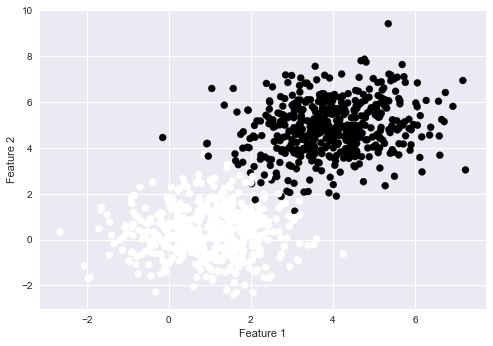

In [7]:
### Data visulization
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [24]:
## Data modeling
"""Written by Deepanshu garg"""

def sigmoid(Z):
    """Function convert the output in range {0,1}"""
    return (1.0)/(1.0 + np.exp(-1.0 * Z))

def hypothesis(X,Weights):
    """Function return the hypothesis"""
    z = np.dot(X,Weights)
    return sigmoid(z)

def loss(X,Y,weights):
    """Binary Cross Entropy loss"""
    Y_ = hypothesis(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost/X.shape[0]

def update(X,Y,Weights,learning_rate = 0.5):
    """Update the parameters"""
    Y_ = hypothesis(X,Weights)
    dw = np.dot(X.T,Y_ - Y)
    Weights = Weights - learning_rate*dw/(float(X.shape[0]))
    return Weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    """Train the model"""
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    #Iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [27]:
weights = train(X_train,Y_train,learning_rate=0.8,maxEpochs=100)

Epoch 0 Loss 0.0009
Epoch 10 Loss 0.0003
Epoch 20 Loss 0.0002
Epoch 30 Loss 0.0002
Epoch 40 Loss 0.0002
Epoch 50 Loss 0.0001
Epoch 60 Loss 0.0001
Epoch 70 Loss 0.0001
Epoch 80 Loss 0.0001
Epoch 90 Loss 0.0001


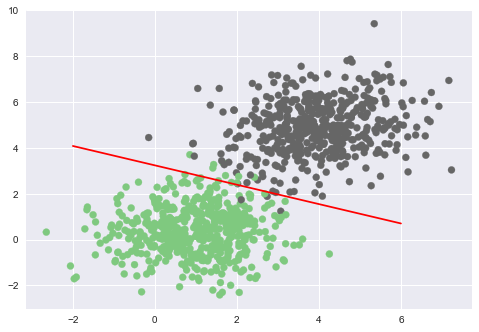

In [32]:
### Visulizing the boundary
x1 = np.linspace(-2,6,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

plt.scatter(data[:,0],data[:,1],c=data[:,2],cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()